# Building a 'Mobile Friendly' PokeDex
10-way Pokemon Classification
<html>
    <div style="width:100%">
        <div style="width:150px;height:150px;margin:auto">
            <img src="https://image.flaticon.com/icons/svg/188/188937.svg" >
        </div>
    </div>
</html>

## PROBLEM STATEMENT

We have number of images from 10 classes of pokemons and we want to build and train AlexNet on the given data. Upload your predictions for Images in Test Folder as a .csv file.

###### Use Transfer Learning on Mobilenet's
Use Transfer Learning/ Fine-Tuning to improve the accuracy you got from Alexnet. You may use any pre-trained network like Resnet, Inception, Mobilenet from Keras and fine tune it using small learning rate. If you want to build an efficient memory friendly network - then MobileNet can be good choice as it uses light-weight convolutions, which reduce the number of parameters and model size is of few MB's which can easily fit inside Phone Memory! Recomme

# Making new folder for validation data Generator

In [1]:
import matplotlib.pyplot as plt
import os 
import shutil

In [3]:
classes=os.listdir("./Images")

In [8]:
classes

In [7]:
for i in classes:
    images=os.listdir(os.path.join("./Images",i))
    print(i,len(images))

Aerodactyl 80
Bulbasaur 255
Charmander 264
Dratini 96
Fearow 111
Meowth 63
Pikachu 268
Psyduck 143
Spearow 117
Squirtle 248


### Now make new directory and transfer 10% of images of each category to val/category

In [16]:
os.mkdir("val")

In [17]:
for i in classes:
    images=os.listdir(os.path.join("./Images",i))
    length=int(.1*len(images))
    os.mkdir("val/"+i)
    for j in images[:length]:
        shutil.move("./Images/"+i+"/"+j,"./val/"+i)

In [4]:
for i in classes:
    images1=os.listdir(os.path.join("./Images",i))
    print("train",i,len(images1))
    images2=os.listdir(os.path.join("./val",i))
    print("val",i,len(images2))

train Aerodactyl 72
val Aerodactyl 8
train Bulbasaur 230
val Bulbasaur 25
train Charmander 238
val Charmander 26
train Dratini 87
val Dratini 9
train Fearow 100
val Fearow 11
train Meowth 57
val Meowth 6
train Pikachu 242
val Pikachu 26
train Psyduck 129
val Psyduck 14
train Spearow 106
val Spearow 11
train Squirtle 224
val Squirtle 24


## Image Data Generator

In [5]:
from keras.applications.mobilenet import MobileNet
from keras.applications.mobilenet import preprocess_input

Using TensorFlow backend.


In [20]:
model=MobileNet(weights="imagenet",input_shape=(224,224,3),include_top=False)

In [21]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

In [11]:
from keras.preprocessing.image import ImageDataGenerator

In [12]:
train=ImageDataGenerator(preprocessing_function=preprocess_input)
val=ImageDataGenerator(preprocessing_function=preprocess_input)

In [49]:
tr_gen=train.flow_from_directory("Images/",target_size=(224,224),batch_size=32,class_mode="categorical")

Found 1480 images belonging to 10 classes.


In [48]:
val_gen=val.flow_from_directory("val/",target_size=(224,224),batch_size=32,class_mode="categorical")

Found 160 images belonging to 10 classes.


## Now we have a model whose dense layer have been removed now add layer using functional api

In [23]:
from keras.models import Model
from keras.layers import *

In [25]:
model.output

<tf.Tensor 'conv_pw_13_relu_5/Relu6:0' shape=(None, 7, 7, 1024) dtype=float32>

In [27]:
avl=GlobalAveragePooling2D()(model.output)
fc1=Dense(256,activation="relu")(avl)
d1=Dropout(0.5)(fc1)
fc2=Dense(10,activation="softmax")(d1)

In [28]:
complete_model=Model(model.input,fc2)

In [78]:
complete_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128 

In [41]:
for ix in range(88):
    complete_model.layers[ix].trainable=False

In [46]:
complete_model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [50]:
history=complete_model.fit_generator(tr_gen,epochs=5,steps_per_epoch=50,validation_data=val_gen,validation_steps=5)

Epoch 1/5


C:\Users\User\Anaconda3\lib\site-packages\PIL\Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


50/50 [==============================] - 333s 7s/step - loss: 1.5542 - accuracy: 0.5076 - val_loss: 1.0776 - val_accuracy: 0.6500
Epoch 2/5
50/50 [==============================] - 309s 6s/step - loss: 0.6997 - accuracy: 0.7684 - val_loss: 0.9796 - val_accuracy: 0.6625
Epoch 3/5
50/50 [==============================] - 321s 6s/step - loss: 0.5004 - accuracy: 0.8312 - val_loss: 1.0088 - val_accuracy: 0.6875
Epoch 4/5
50/50 [==============================] - 322s 6s/step - loss: 0.3950 - accuracy: 0.8775 - val_loss: 0.2211 - val_accuracy: 0.7563
Epoch 5/5
50/50 [==============================] - 315s 6s/step - loss: 0.3332 - accuracy: 0.8976 - val_loss: 0.5270 - val_accuracy: 0.8125


In [56]:
import pandas as pd
import numpy as np
from keras.preprocessing import image

In [53]:
data=pd.read_csv("./sample_submission.csv")

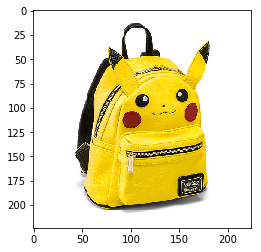

In [70]:
for idx,i in enumerate(data["Name"]):
    img_path ="./test/"+i
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    
    t=np.argmax(complete_model.predict(x))
    data.iloc[idx,1]=t

In [71]:
data.to_csv("main2.csv",index=False)

In [66]:
val_gen.class_indices,tr_gen.class_indices

({'Aerodactyl': 0,
  'Bulbasaur': 1,
  'Charmander': 2,
  'Dratini': 3,
  'Fearow': 4,
  'Meowth': 5,
  'Pikachu': 6,
  'Psyduck': 7,
  'Spearow': 8,
  'Squirtle': 9},
 {'Aerodactyl': 0,
  'Bulbasaur': 1,
  'Charmander': 2,
  'Dratini': 3,
  'Fearow': 4,
  'Meowth': 5,
  'Pikachu': 6,
  'Psyduck': 7,
  'Spearow': 8,
  'Squirtle': 9})